# Bike Sharing Demand Prediction

### Introduction

Bike sharing systems are increasingly popular in urban areas as a convenient and eco-friendly transportation mode. Understanding the factors influencing bike rental demand can help optimize bike availability, infrastructure planning, and resource allocation for bike-sharing companies.

This project aims to analyze bike sharing data and develop a machine learning model to predict bike rental demand. By leveraging exploratory data analysis (EDA) techniques and machine learning algorithms, we seek to uncover insights into bike rental patterns and build an accurate predictive model.
Objectives

* Analyze the distribution of bike rentals across different time periods (hourly, daily, monthly, seasonal).
* Investigate the impact of weather conditions, day of the week, and other factors on bike rental demand.
* Develop a machine learning model to predict bike rental counts based on relevant features.
* Evaluate the performance of the predictive model and identify areas for improvement.

### Dataset

The dataset consists of historical bike rental data collected over two years, including the following columns:
dteday, hr, season, weathersit, temp, atemp, hum, windspeed, cnt

### Methodology

* Data Preprocessing: Handle missing values, feature engineering, and data transformation using Dask.
* Exploratory Data Analysis (EDA): Visualize the dataset to understand distributions, correlations, and trends using Seaborn and Matplotlib.
* Feature Selection: Identify relevant features for the predictive model.
* Model Development: Build different machine learning models and additionally use Neural network to predict bike rental demand.
* Model Evaluation: Assess the model's performance using appropriate metrics and techniques.

### Tools and Technologies

* Dask: For efficient data manipulation and handling large datasets.
* TensorFlow: For developing and training the machine learning model.
* Google Colab: For an interactive and collaborative coding environment.
* Seaborn & Matplotlib: For data visualization.
* Scikit-learn: For traditional machine learning algorithms and model evaluation.

By the end of this project, we aim to provide insights into bike rental patterns and develop a reliable model for predicting future bike rental demand

### Load the data

In [ ]:
# Mount google drive & go to dataset folder

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/'

Mounted at /content/drive
/content/drive/My Drive/BlueYonder


In [ ]:
# Install Dask
!pip install dask                                                                  # pip install necessary dependencies
!pip install dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00


In [ ]:
# Import dependencies for EDA part
import dask.dataframe as dd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Exploratory Data Analysis

In [ ]:
# Read the CSV files using Dask
ddf_hour = dd.read_csv('hour.csv')                                                # Hourly count file

# Check the dataset
print("First few rows of the dataset:")
print(ddf_hour.head(3))                                                           # Print first few rows of the file

print('\nColumns of the Data:', ddf_hour.columns)                                 # Print only the columns

First few rows of the dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  

Columns of the Data: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [ ]:
# Drop the 'instant' column
ddf_hour = ddf_hour.drop(columns=['instant'])

# Information about the loaded file
print("\nData types and null values:")
print(ddf_hour.info())


Data types and null values:
<class 'dask.dataframe.core.DataFrame'>
Columns: 16 entries, dteday to cnt
dtypes: float64(4), int64(11), string(1)None


The below calculation is done, since there should be 17544 instances (for 2 years) and the hour.csv contains 17379 instances.

In [ ]:
# Find the missing instances and print it

ddf_hour['dteday'] = dd.to_datetime(ddf_hour['dteday'])                           # Convert 'dteday' column to datetime format

hour_counts_per_day = ddf_hour.groupby('dteday')['hr'].nunique().compute()        # Group the DataFrame by date and count the number of unique hours for each date

missing_dates = hour_counts_per_day[hour_counts_per_day < 24]                     # Filter dates where the count is less than 24

for date, count in missing_dates.items():                                         # Print the missing dates and the count of available hours
    print("Date:", date.date(), "- Available hours:", count)


Date: 2011-01-02 - Available hours: 23
Date: 2011-01-03 - Available hours: 22
Date: 2011-01-04 - Available hours: 23
Date: 2011-01-05 - Available hours: 23
Date: 2011-01-06 - Available hours: 23
Date: 2011-01-07 - Available hours: 23
Date: 2011-01-11 - Available hours: 22
Date: 2011-01-12 - Available hours: 22
Date: 2011-01-14 - Available hours: 23
Date: 2011-01-18 - Available hours: 12
Date: 2011-01-19 - Available hours: 23
Date: 2011-01-22 - Available hours: 23
Date: 2011-01-23 - Available hours: 23
Date: 2011-01-24 - Available hours: 23
Date: 2011-01-25 - Available hours: 23
Date: 2011-01-26 - Available hours: 16
Date: 2011-01-27 - Available hours: 8
Date: 2011-01-28 - Available hours: 23
Date: 2011-01-29 - Available hours: 23
Date: 2011-01-30 - Available hours: 23
Date: 2011-02-01 - Available hours: 23
Date: 2011-02-03 - Available hours: 23
Date: 2011-02-04 - Available hours: 23
Date: 2011-02-09 - Available hours: 23
Date: 2011-02-10 - Available hours: 23
Date: 2011-02-11 - Availab

In [ ]:
# Check for missing values
print(ddf_hour.isnull().sum().compute())                                          # this prints the missing values in the file

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There are no ZERO values, thus we dont need to deal missing/null values.

In [ ]:
# Summary statistics
print("\nSummary statistics for the Bike sharing dataset:")
print(ddf_hour.describe().compute())


Summary statistics for the Bike sharing dataset:
          instant               dteday        season            yr  \
count  17379.0000                17379  17379.000000  17379.000000   
min        1.0000  2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000  2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000  2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000  2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000  2012-12-31 00:00:00      4.000000      1.000000   
mean    8690.0000                 <NA>      2.501640      0.502561   
std     5017.0295                 <NA>      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      6.000000      0.000000      1.000000      0.000000   
50%

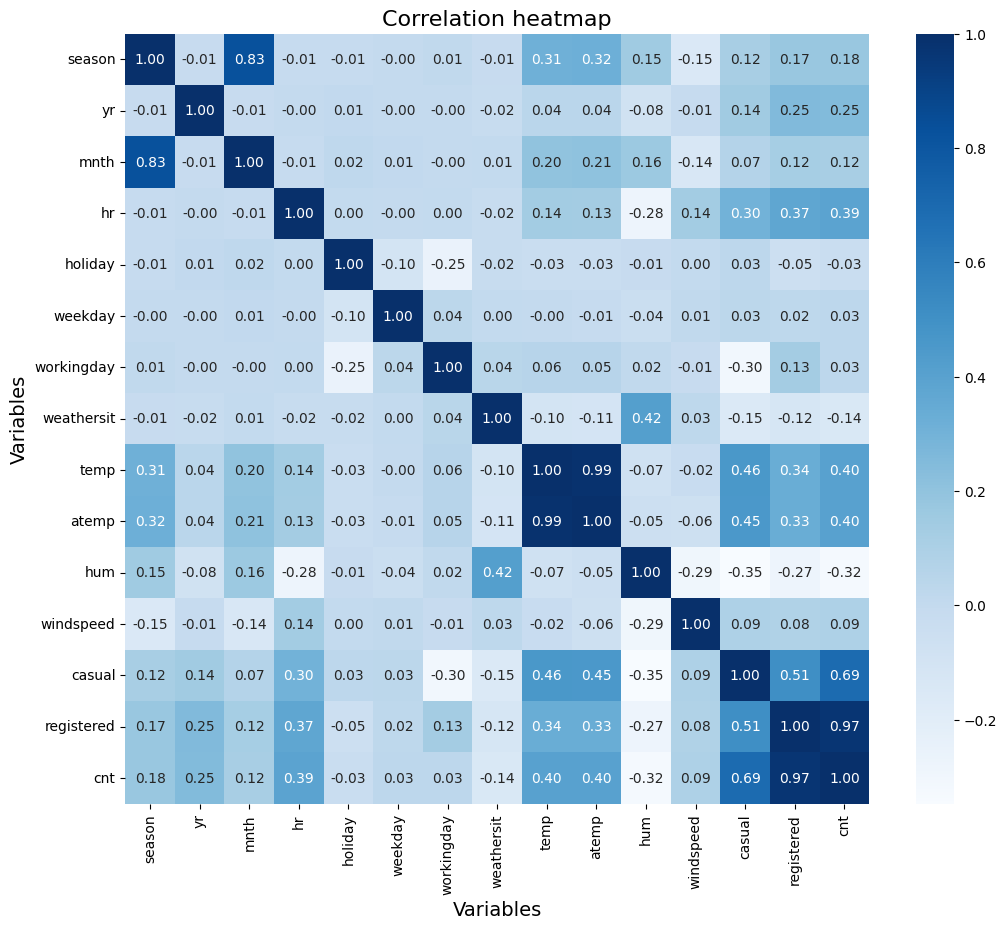

In [ ]:
# Plot: Correlation

numeric_columns = ddf_hour.select_dtypes(include=['float', 'int']).columns        # Select only numeric columns

# Compute the correlations between the numeric features
plt.figure(figsize=(12, 10))                                                      # Plot a heatmap
sns.heatmap(ddf_hour[numeric_columns].corr().compute(), annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10})
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.title('Correlation heatmap', fontsize=16)
plt.show()

Analysis for distribution of bike rentals counts along hour, day, month, season, weather conditions

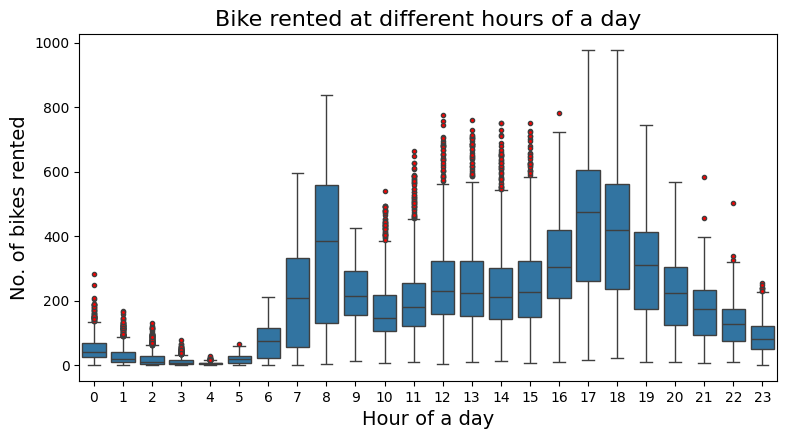

In [ ]:
# Plot: Distribution - Number of bikes rented at different hours of the day

plt.figure(figsize=(9, 4.5))
ax = sns.boxplot(x='hr', y='cnt', data=ddf_hour.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))
plt.title('Bike rented at different hours of a day', fontsize=16)

for i, artist in enumerate(ax.artists):
    ax.bar_label(artist, fmt='%.2f', label_type='center')

plt.xlabel('Hour of a day', fontsize=14)
plt.ylabel('No. of bikes rented', fontsize=14)
plt.show()

<ipython-input-12-6716b33f2c26>:5: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='weekday', y='cnt', hue='season', palette=sns.color_palette("Blues", n_colors=3), data=ddf_hour.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))


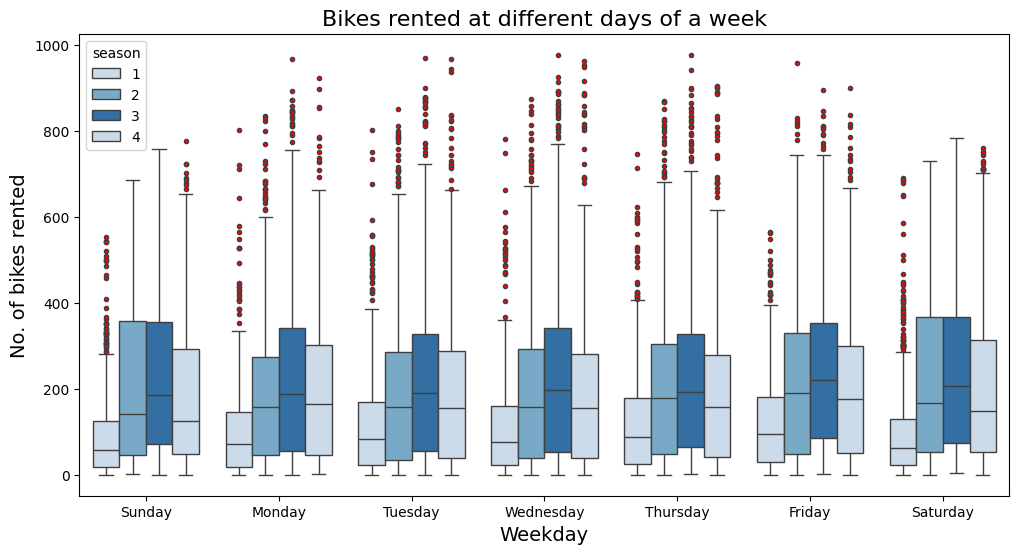

In [ ]:
# Plot: Distribution - Number of bikes rented at different days of the week

day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']  # Define the names of the days of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', hue='season', palette=sns.color_palette("Blues", n_colors=3), data=ddf_hour.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('No. of bikes rented', fontsize=14)
plt.xticks(ticks=range(7), labels=day_names)
plt.title('Bikes rented at different days of a week', fontsize=16)
plt.show()

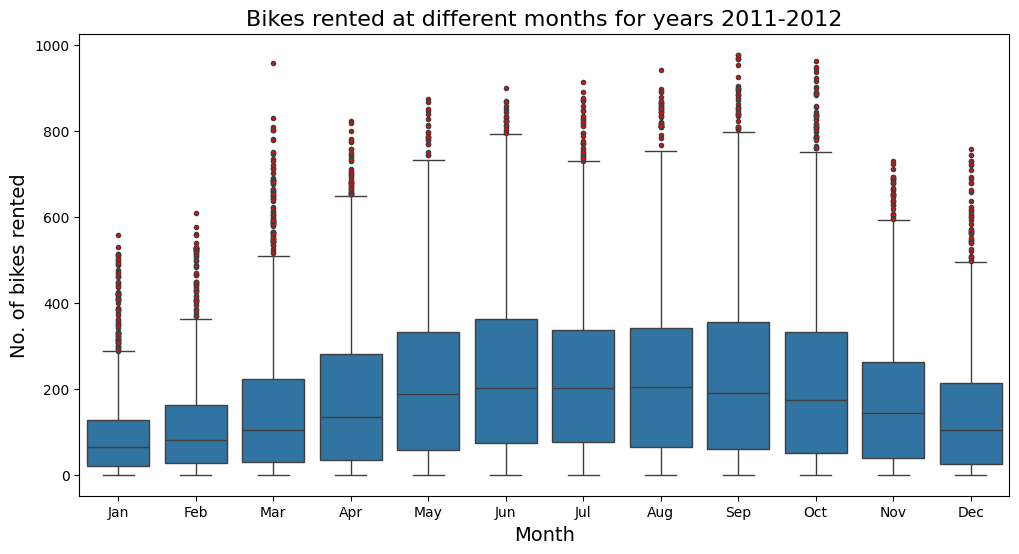

In [ ]:
# Plot: Distribution - Number of bikes rented at different months for year 2011-2012

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # Define the names of the months of a year
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=ddf_hour.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))
plt.xlabel('Month', fontsize=14)
plt.ylabel('No. of bikes rented', fontsize=14)
plt.xticks(ticks=range(12), labels=month_names)
plt.title('Bikes rented at different months for years 2011-2012', fontsize=16)
plt.show()

<ipython-input-14-8f6485e32b44>:16: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='season', y='cnt', hue='weathersit', palette=sns.color_palette("Blues", n_colors=3), data=ddf_hour_seasons.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))


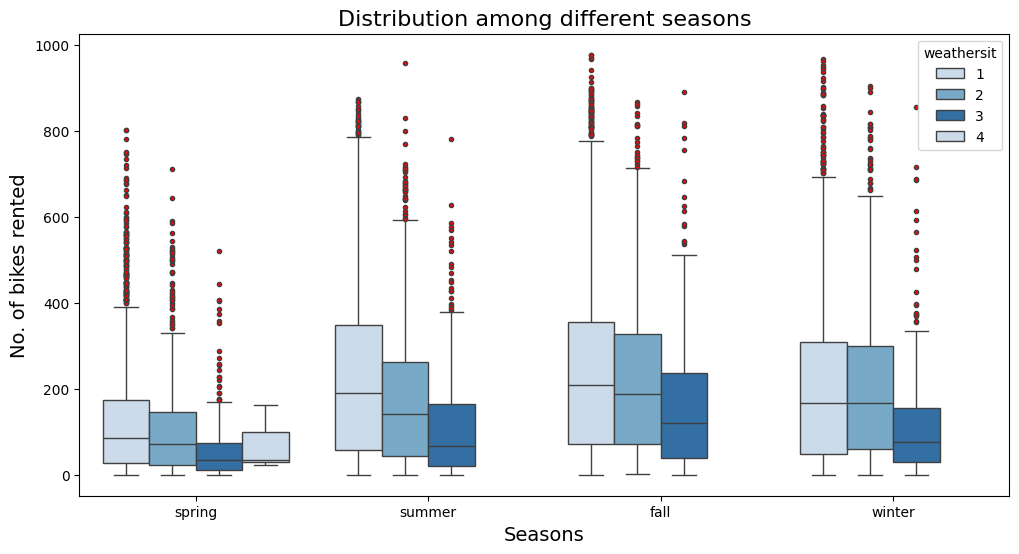

In [ ]:
# Plot: Distribution - Number of bikes rented at different seasons for year 2011-2012

# Convert 'season' column to categorical dtype with known categories
ddf_hour['season'] = ddf_hour['season'].astype('category')
ddf_hour['season'] = ddf_hour['season'].cat.as_known()

# Get dummies for 'season' column
ddf_hour_seasons = dd.get_dummies(ddf_hour, columns=['season'], dtype=int)

# Map the encoded columns to season names
ddf_hour_seasons['season'] = ddf_hour_seasons[['season_1', 'season_2', 'season_3', 'season_4']].idxmax(axis=1)
ddf_hour_seasons['season'] = ddf_hour_seasons['season'].map({'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', hue='weathersit', palette=sns.color_palette("Blues", n_colors=3), data=ddf_hour_seasons.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))
plt.xlabel('Seasons', fontsize=14)
plt.ylabel('No. of bikes rented', fontsize=14)
plt.title('Distribution among different seasons', fontsize=16)
plt.show()

<ipython-input-15-f2b417a5436d>:15: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='weathersit', y='cnt', hue='season', palette=sns.color_palette("Blues", n_colors=3), data=ddf_hour_weathersit.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))


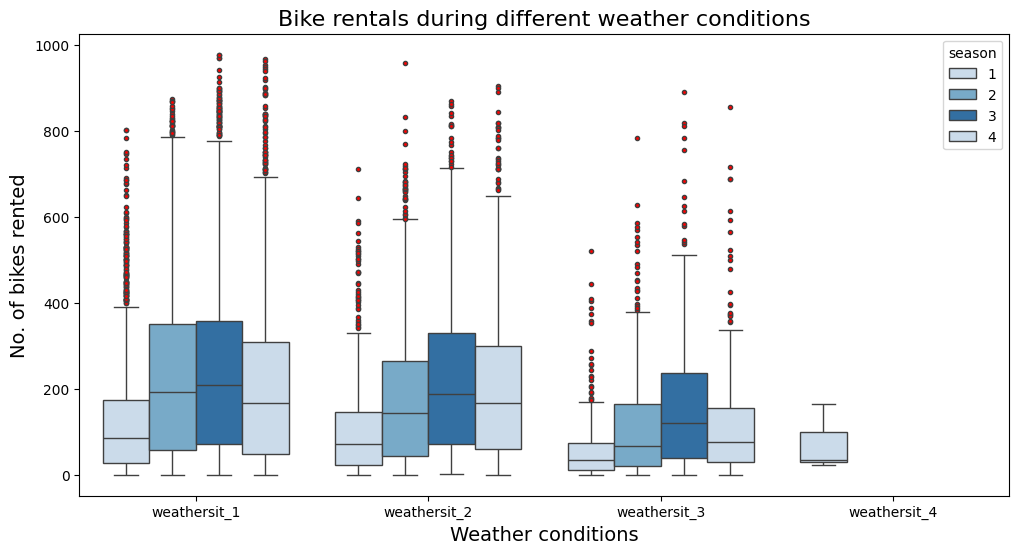

In [ ]:
# Plot: Distribution - Number of bikes rented during different weather conditions

# Convert 'weathersit' column to categorical dtype with known categories
ddf_hour['weathersit'] = ddf_hour['weathersit'].astype('category')
ddf_hour['weathersit'] = ddf_hour['weathersit'].cat.as_known()

# Get dummies for 'weathersit' column
ddf_hour_weathersit = dd.get_dummies(ddf_hour, columns=['weathersit'], dtype=int)

# Map the encoded columns to weather conditions
ddf_hour_weathersit['weathersit'] = ddf_hour_weathersit[['weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']].idxmax(axis=1)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', hue='season', palette=sns.color_palette("Blues", n_colors=3), data=ddf_hour_weathersit.compute(), flierprops=dict(marker='o', markersize=3, markerfacecolor='red'))
plt.xlabel('Weather conditions', fontsize=14)
plt.ylabel('No. of bikes rented', fontsize=14)
plt.title('Bike rentals during different weather conditions', fontsize=16)
plt.show()

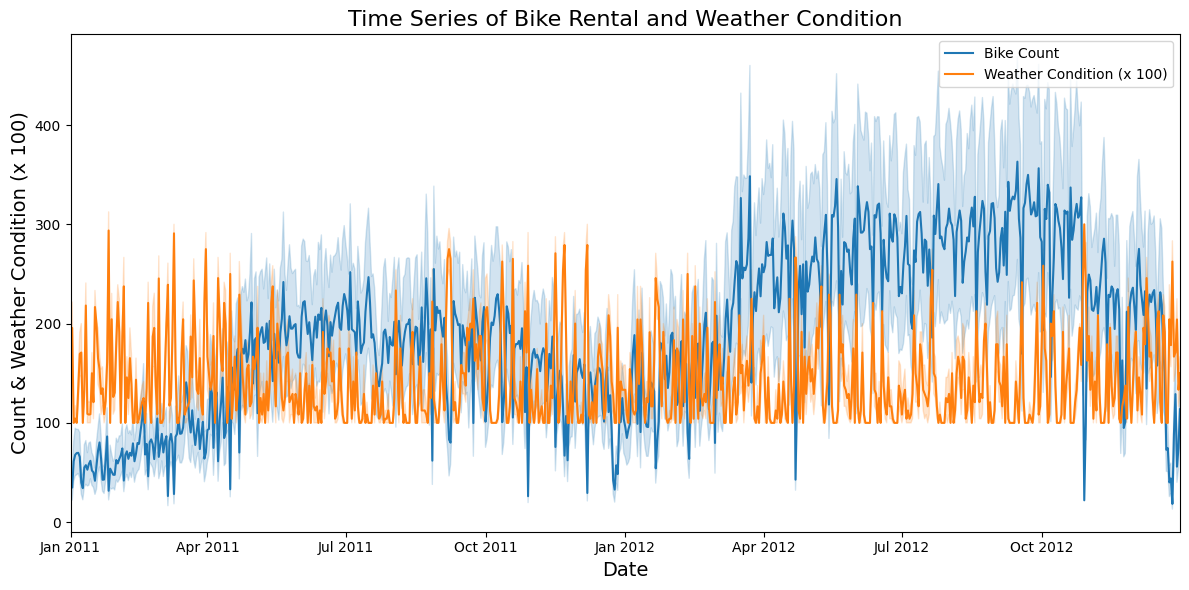

In [ ]:
# Plot : Description - Time-series plot for count & weather conditions

ddf_hour_temp = ddf_hour.copy()                                                   # Create a copy of the DataFrame

# Convert 'weathersit' column to numeric
ddf_hour_temp['weathersit'] = ddf_hour_temp['weathersit'].astype('float64')

# Multiply 'weathersit' by 100 to keep both variables in the same range
ddf_hour_temp['weathersit'] *= 100

# Compute the DataFrame before plotting
ddf_hour_temp_computed = ddf_hour_temp.compute()

# Plot the time series graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=ddf_hour_temp_computed, label='Bike Count')
sns.lineplot(x='dteday', y='weathersit', data=ddf_hour_temp_computed, label='Weather Condition (x 100)')
plt.title('Time Series of Bike Rental and Weather Condition', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count & Weather Condition (x 100)', fontsize=14)
plt.legend()

# Set the x-axis limits to start from the first date in the DataFrame
start_date = ddf_hour_temp_computed['dteday'].min()
end_date = ddf_hour_temp_computed['dteday'].max()
plt.xlim(start_date, end_date)

# Format the x-axis tick labels to display month and year with a 3-month interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.tight_layout()
plt.show()

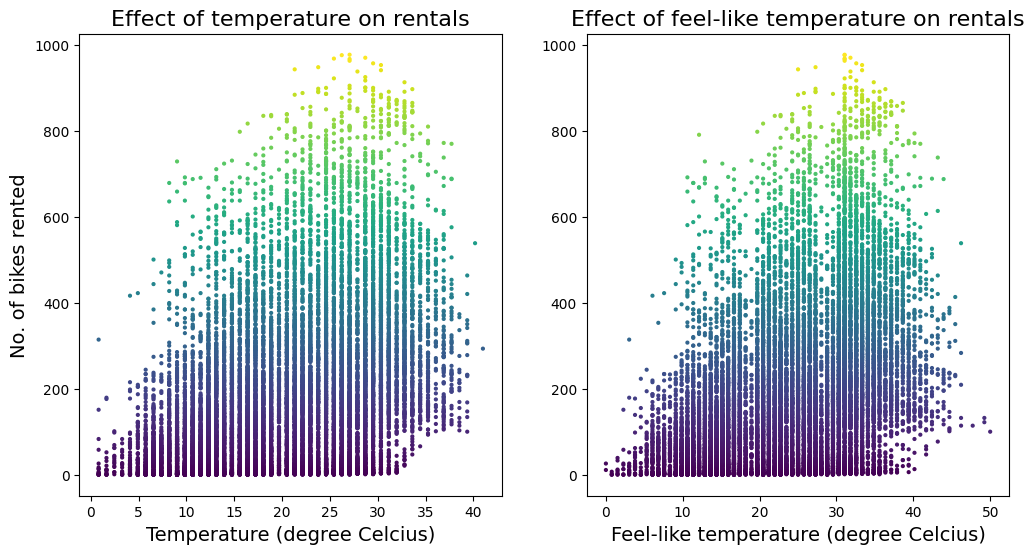

In [ ]:
# Plot : Description - Scatter plots for temperature & feel-like temperature

plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.scatter(x=ddf_hour['temp'] * 41, y=ddf_hour['cnt'], s=4, c=ddf_hour['cnt'], cmap='viridis')   # Multiplied with 41, to convert to celcius as mentioned in the dataset documentation
plt.xlabel("Temperature (degree Celcius)", fontsize=14)
plt.ylabel("No. of bikes rented", fontsize=14)
plt.title('Effect of temperature on rentals', fontsize=16)
plt.grid(False)
plt.subplot(1, 2, 2)
plt.scatter(x=ddf_hour['atemp'] * 50, y=ddf_hour['cnt'], s=4, c=ddf_hour['cnt'], cmap='viridis')  # Multiplied with 50, to convert to celcius as mentioned in the dataset documentation
plt.xlabel("Feel-like temperature (degree Celcius)", fontsize=14)
plt.title('Effect of feel-like temperature on rentals', fontsize=16)
plt.grid(False)

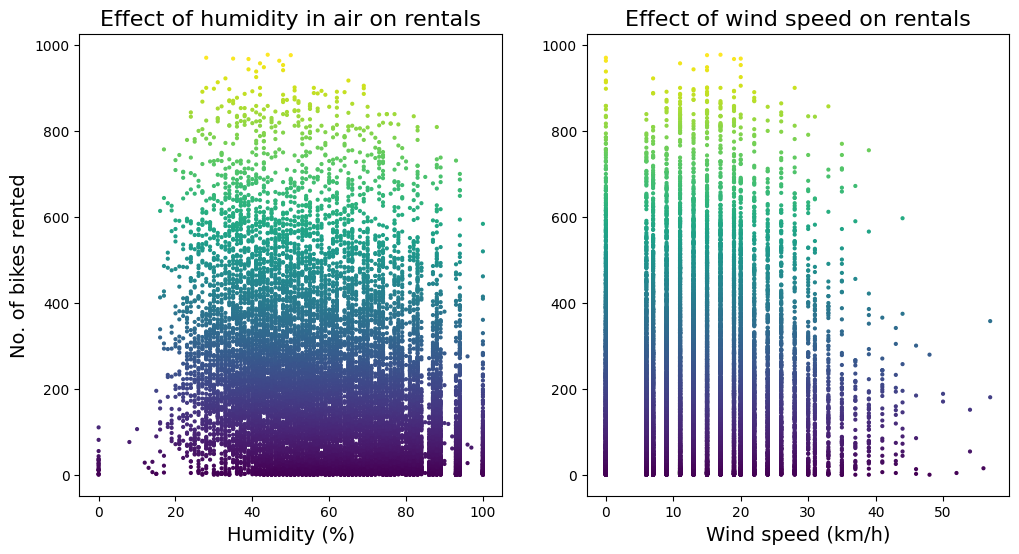

In [ ]:
# Plot: Description - Scatter plots for humidity & wind speed

plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.scatter(x=ddf_hour['hum'] * 100, y=ddf_hour['cnt'], s=4, c=ddf_hour['cnt'], cmap='viridis')       # Multiplied with 100, to convert as mentioned in the dataset documentation
plt.xlabel("Humidity (%)", fontsize=14)
plt.ylabel("No. of bikes rented", fontsize=14)
plt.title('Effect of humidity in air on rentals', fontsize=16)
plt.grid(False)
plt.subplot(1, 2, 2)
plt.scatter(x=ddf_hour['windspeed'] * 67, y=ddf_hour['cnt'], s=4, c=ddf_hour['cnt'], cmap='viridis')  # Multiplied with 67, to convert to metre/sec as mentioned in the dataset documentation
plt.xlabel("Wind speed (km/h)", fontsize=14)
plt.title('Effect of wind speed on rentals', fontsize=16)
plt.grid(False)
plt.show()

Machine Learning

In [ ]:
# Import dependencies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load and check data

ddf_hour = dd.read_csv('hour.csv')                                                # Load the data with Dask again

ddf_hour.head(2)                                                                  # Check the data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [ ]:
# Preprocessing the data before ML

df_hour = ddf_hour.compute()                                                      # Convert to Pandas DataFrame

# Perform data preprocessing for date time stuffs
df_hour['datetime'] = pd.to_datetime(df_hour['dteday'])
df_hour['hour'] = df_hour['datetime'].dt.hour
df_hour['dayofweek'] = df_hour['datetime'].dt.dayofweek

# Define features and target variable
X = df_hour.drop(['cnt', 'dteday', 'datetime', 'instant'], axis=1)                # Drop unnecessary columns
y = df_hour['cnt']                                                                # Target variable
print('\nColumns of X:', X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nDimension of X_train, y_train, X_test and y_test, respectively are')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Columns of X: Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'hour', 'dayofweek'],
      dtype='object')

Dimension of X_train, y_train, X_test and y_test, respectively are
(13903, 16) (13903,) (3476, 16) (3476,)


In [ ]:
# Check with different models and print the Mean Absolute Error (MAE)

# Initialize the models
models = {"Linear Regression": LinearRegression(), "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()}

# Train and evaluate the models
mae_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[name] = mae

# Display MAE for each model
for name, mae in mae_results.items():
    print(f"{name}: {mae}")

Linear Regression: 7.694471578238142e-14
Decision Tree: 2.265247410817031
Random Forest: 0.9317635212888379


Note: Since Dask doesn't directly support TensorFlow for distributed training, one would typically train the model on a single machine and using Dask for data preparation.


Simple Neural Network Model :

In [ ]:
# Use a Neural Network model and check the MAE

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error (MAE):", mae)


Epoch 1/10
348/348 [==============================] - 2s 3ms/step - loss: 3560.5444 - mae: 16.8370 - val_loss: 0.7007 - val_mae: 0.4794
Epoch 2/10
348/348 [==============================] - 1s 3ms/step - loss: 0.3985 - mae: 0.3790 - val_loss: 0.1822 - val_mae: 0.2614
Epoch 3/10
348/348 [==============================] - 1s 3ms/step - loss: 0.1279 - mae: 0.2342 - val_loss: 0.1300 - val_mae: 0.2668
Epoch 4/10
348/348 [==============================] - 1s 3ms/step - loss: 0.0521 - mae: 0.1566 - val_loss: 0.0455 - val_mae: 0.1579
Epoch 5/10
348/348 [==============================] - 1s 3ms/step - loss: 0.0334 - mae: 0.1277 - val_loss: 0.0256 - val_mae: 0.1144
Epoch 6/10
348/348 [==============================] - 1s 2ms/step - loss: 0.0277 - mae: 0.1153 - val_loss: 0.0406 - val_mae: 0.1601
Epoch 7/10
348/348 [==============================] - 1s 2ms/step - loss: 0.0190 - mae: 0.0957 - val_loss: 0.0139 - val_mae: 0.0861
Epoch 8/10
348/348 [==============================] - 1s 2ms/step - loss

Comparing these MAE values:

*    Linear Regression: The MAE value for linear regression is exceptionally
small, almost zero (7.694471578238142e-14). This could indicate either a perfect fit to the data (unlikely, especially considering real-world noise).

*    Decision Tree: The MAE value for the decision tree model is 2.26, which means, on average, the predictions are off by approximately 2.26 units from the actual values.

*    Random Forest: The MAE value for the random forest model is 0.931, indicating that, on average, its predictions are off by approximately 0.93 units from the actual values.

*    TensorFlow Model: The MAE value for the TensorFlow model is 0.0747, suggesting that, on average, its predictions are off by about 0.0747 units from the actual values.

Comparing these models, the TensorFlow model appears to have the lowest MAE, indicating that it's making predictions with the smallest average absolute error compared to the other models.